<a href="https://colab.research.google.com/github/Rhysand9000/Challenge-Alura-Store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

# URLs de los archivos CSV
urls = {
    "Tienda 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "Tienda 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "Tienda 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "Tienda 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
}

# Lista para guardar cada DataFrame con su respectiva etiqueta
dataframes = []

# Leer, etiquetar y guardar cada archivo
for nombre_tienda, url in urls.items():
    df = pd.read_csv(url)
    df['Tienda'] = nombre_tienda
    dataframes.append(df)

# Unir todos los datos en un único DataFrame
df_tiendas = pd.concat(dataframes, ignore_index=True)

# Mostrar los primeros datos para verificar
df_tiendas.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


#1. Análisis de facturación



In [ ]:
# Calcular ingresos totales por tienda
ingresos = df_tiendas.groupby("Tienda")["Precio"].sum().astype(int)

# Imprimir resultado con formato de miles
print("Análisis de facturación – Ingreso total por tienda:")
for tienda, ingreso in ingresos.items():
    print(f"- {tienda}: {ingreso:,}".replace(",", "."))


Análisis de facturación – Ingreso total por tienda:
- Tienda 1: 1.150.880.400
- Tienda 2: 1.116.343.500
- Tienda 3: 1.098.019.600
- Tienda 4: 1.038.375.700


# 2. Ventas por categoría

In [ ]:
# Agrupar por Tienda y Categoría del Producto y contar las ventas
ventas_por_categoria = df_tiendas.groupby(['Tienda', 'Categoría del Producto']).size().reset_index(name='Cantidad de Ventas')

# Mostrar tabla ordenada (opcional)
ventas_ordenadas = ventas_por_categoria.sort_values(['Tienda', 'Cantidad de Ventas'], ascending=[True, False])
display(ventas_ordenadas)




,Tienda,Categoría del Producto,Cantidad de Ventas
7,Tienda 1,Muebles,465
3,Tienda 1,Electrónicos,448
5,Tienda 1,Juguetes,324
2,Tienda 1,Electrodomésticos,312
1,Tienda 1,Deportes y diversión,284
4,Tienda 1,Instrumentos musicales,182
6,Tienda 1,Libros,173
0,Tienda 1,Artículos para el hogar,171
15,Tienda 2,Muebles,442
11,Tienda 2,Electrónicos,422


In [ ]:
# Obtener la categoría más vendida por tienda
categoria_top = ventas_por_categoria.sort_values('Cantidad de Ventas', ascending=False).groupby('Tienda').first().reset_index()

print("Categoría más vendida por tienda:")
for _, row in categoria_top.iterrows():
    print(f"- {row['Tienda']}: {row['Categoría del Producto']} ({row['Cantidad de Ventas']} ventas)")

Categoría más vendida por tienda:
- Tienda 1: Muebles (465 ventas)
- Tienda 2: Muebles (442 ventas)
- Tienda 3: Muebles (499 ventas)
- Tienda 4: Muebles (480 ventas)


# 3. Calificación promedio de la tienda


In [ ]:
# Calcular la calificación promedio por tienda
valoracion_media = df_tiendas.groupby('Tienda')['Calificación'].mean().round(2)

# Mostrar resultados
print("Valoración media por tienda:")
for tienda, calificacion in valoracion_media.items():
    print(f"- {tienda}: {calificacion}")


Valoración media por tienda:
- Tienda 1: 3.98
- Tienda 2: 4.04
- Tienda 3: 4.05
- Tienda 4: 4.0


# 4. Productos más y menos vendidos

In [ ]:
# Contar cuántas veces se vendió cada producto por tienda
ventas_por_producto = df_tiendas.groupby(['Tienda', 'Producto']).size().reset_index(name='Cantidad de Ventas')


In [ ]:
# Obtener producto más y menos vendido por tienda
mas_vendidos = ventas_por_producto.sort_values('Cantidad de Ventas', ascending=False).groupby('Tienda').first().reset_index()
menos_vendidos = ventas_por_producto.sort_values('Cantidad de Ventas', ascending=True).groupby('Tienda').first().reset_index()

# Mostrar resultados
print("📈 Producto MÁS vendido por tienda:")
for _, row in mas_vendidos.iterrows():
    print(f"- {row['Tienda']}: {row['Producto']} ({row['Cantidad de Ventas']} ventas)")

print("\n📉 Producto MENOS vendido por tienda:")
for _, row in menos_vendidos.iterrows():
    print(f"- {row['Tienda']}: {row['Producto']} ({row['Cantidad de Ventas']} ventas)")


📈 Producto MÁS vendido por tienda:
- Tienda 1: TV LED UHD 4K (60 ventas)
- Tienda 2: Iniciando en programación (65 ventas)
- Tienda 3: Kit de bancas (57 ventas)
- Tienda 4: Cama box (62 ventas)

📉 Producto MENOS vendido por tienda:
- Tienda 1: Auriculares con micrófono (33 ventas)
- Tienda 2: Juego de mesa (32 ventas)
- Tienda 3: Bloques de construcción (35 ventas)
- Tienda 4: Guitarra eléctrica (33 ventas)


# 5. Envío promedio por tienda

In [ ]:
# Calcular el costo promedio de envío por tienda
envio_promedio = df_tiendas.groupby('Tienda')['Costo de envío'].mean().round(2)

# Mostrar resultados
print("🚚 Costo de envío promedio por tienda:")
for tienda, costo in envio_promedio.items():
    print(f"- {tienda}: ${costo:,.2f}")


🚚 Costo de envío promedio por tienda:
- Tienda 1: $26,018.61
- Tienda 2: $25,216.24
- Tienda 3: $24,805.68
- Tienda 4: $23,459.46


# 6. GRAFICOS

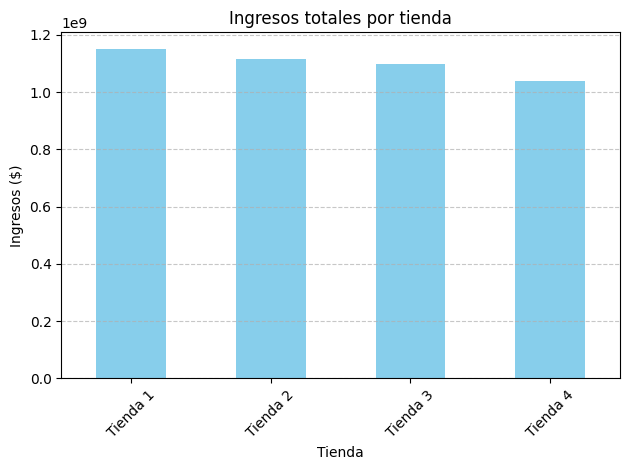

In [ ]:
import matplotlib.pyplot as plt

ingresos = df_tiendas.groupby("Tienda")["Precio"].sum()

ingresos.plot(kind='bar', color='skyblue')
plt.title("Ingresos totales por tienda")
plt.ylabel("Ingresos ($)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


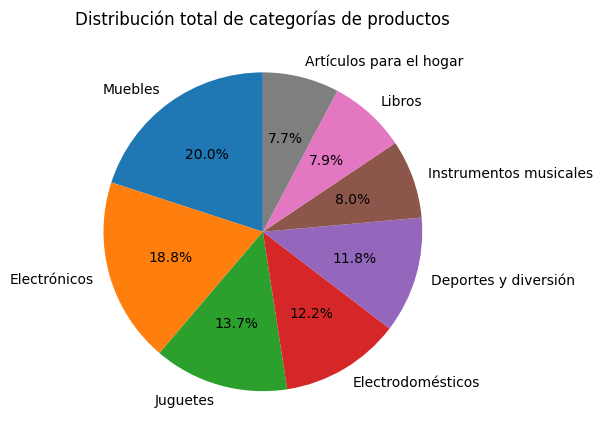

In [ ]:
categorias = df_tiendas['Categoría del Producto'].value_counts()

categorias.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6,6))
plt.title("Distribución total de categorías de productos")
plt.ylabel("")
plt.tight_layout()
plt.show()


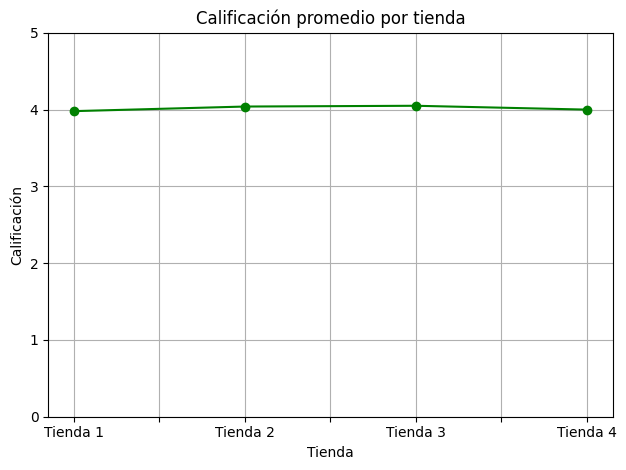

In [ ]:
calificaciones = df_tiendas.groupby("Tienda")["Calificación"].mean().round(2)

calificaciones.plot(kind='line', marker='o', color='green')
plt.title("Calificación promedio por tienda")
plt.ylabel("Calificación")
plt.ylim(0, 5)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Obtener productos más vendidos por tienda
ventas_por_producto = df_tiendas.groupby(['Tienda', 'Producto']).size().reset_index(name='Cantidad de Ventas')
top_productos = ventas_por_producto.sort_values('Cantidad de Ventas', ascending=False).groupby('Tienda').first().reset_index()


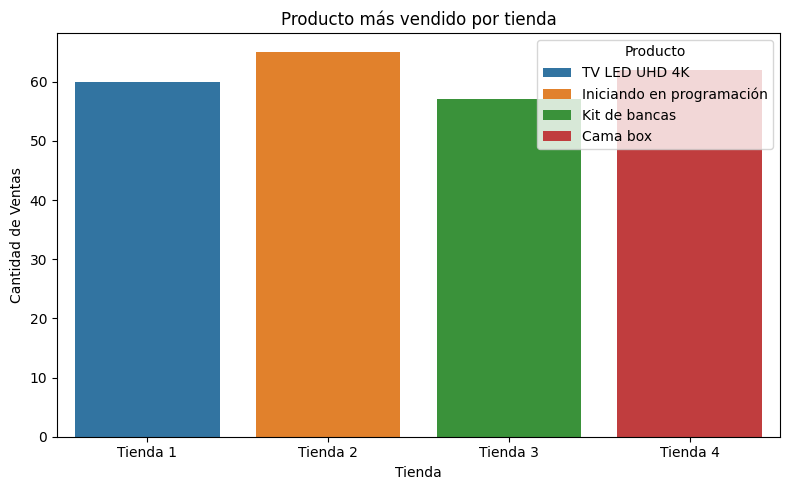

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(data=top_productos, x='Tienda', y='Cantidad de Ventas', hue='Producto')
plt.title("Producto más vendido por tienda")
plt.ylabel("Cantidad de Ventas")
plt.tight_layout()
plt.show()


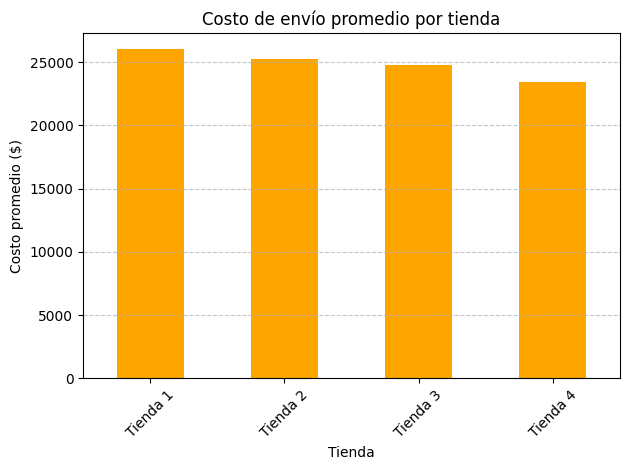

In [ ]:
envio_promedio = df_tiendas.groupby('Tienda')['Costo de envío'].mean().round(2)

envio_promedio.plot(kind='bar', color='orange')
plt.title("Costo de envío promedio por tienda")
plt.ylabel("Costo promedio ($)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
